# 2D VISUALISATION USING PCA

In [413]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [414]:
d0 = pd.read_csv('mnist_train.csv')
d0

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [415]:
l = d0['label'];
d = d0.drop('label',axis = 1)

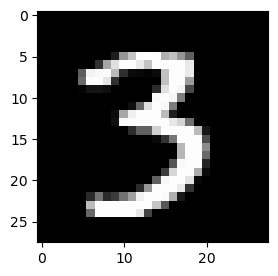

In [416]:
plt.figure(figsize = (3,3))
grid_data = d.iloc[10000].values.reshape(28,28)
plt.imshow(grid_data,interpolation = 'none', cmap = 'gray')
plt.show()

In [417]:
d.iloc[10000]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 10000, Length: 784, dtype: int64

In [418]:
d.shape

(60000, 784)

In [419]:
l.shape

(60000,)

### Normalization of data

In [420]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)

In [421]:
print(f"Before normalization: {d.iloc[1000].values[185]}\nAfter normalization: {standardized_data[100][185]}")

Before normalization: 232
After normalization: 0.21370015867074135


### Obtain Co-variance matrix

In [422]:
covar_matrix = np.matmul(standardized_data.T,standardized_data)

In [423]:
covar_matrix.shape

(784, 784)

### Compute Eigen Values

In [424]:
from scipy.linalg import eigh

In [425]:
e_val, e_vect = eigh(covar_matrix)
# This gives us the eigen values in ascending order

In [426]:
e_values = e_val.T[-2:].T
e_vectors = e_vect.T[-2:].T

In [427]:
print(f"Initial Shape: {e_vectors.shape}")

Initial Shape: (784, 2)


In [428]:
print(f"Final Shape: {e_vectors.shape}") 

Final Shape: (784, 2)


### Obtain final co-ordinates for principal component axis

In [429]:
final_coordinates = np.matmul(standardized_data, e_vectors)

In [430]:
 final_coordinates.shape

(60000, 2)

### Create dataframe

In [431]:
final_coordinates = np.vstack((final_coordinates.T, l)).T

In [432]:
final_coordinates.shape

(60000, 3)

In [433]:
import pandas as pd

In [434]:
dataframe = pd.DataFrame(data = final_coordinates, columns = ("1st Principal","2nd Principal","Label"))

In [435]:
dataframe.head()

,1st Principal,2nd Principal,Label
0,-4.814790,-0.922159,5.0
1,-7.754403,8.708977,0.0
2,9.431338,2.328389,4.0
3,-3.746318,-6.582173,1.0
4,3.133297,-5.183251,9.0


### Plot The data

In [436]:
import matplotlib.pyplot as plt

In [437]:
import seaborn as sbn

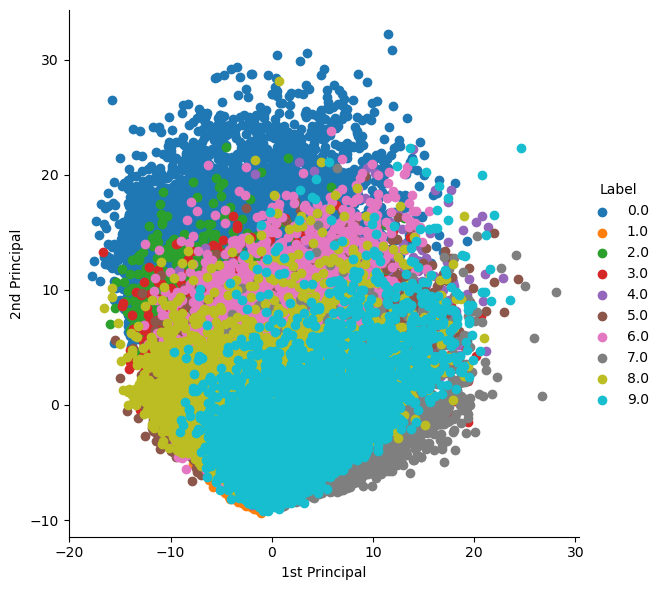

In [438]:
sbn.FacetGrid(dataframe, hue = "Label", height = 6).map(plt.scatter, "1st Principal","2nd Principal").add_legend()

In [439]:
print(f"Variance Retention = {round((np.sum(e_values)/np.sum(e_val))*100,2)}% approx")

Variance Retention = 9.72% approx


# Observations
1. Visualizing the 2 Principal Components we see that few of the labels can be classified into respective regions.
2. Very High overlapping of data is occuring 
3. Visual representation shows that the 2 principal components cannot be used to classify datapoints to labels.
4. About approx 90.28% info about data was lost.

## PCA using sklearn 

In [440]:
from sklearn import decomposition

In [441]:
pca = decomposition.PCA()

In [442]:
pca.n_components = 2

In [443]:
pca_data = pca.fit_transform(d)

In [444]:
pca_data.shape

(60000, 2)

In [445]:
final_pca = np.vstack((pca_data.T, l)).T

In [446]:
final_pca.shape

(60000, 3)

In [447]:
pca_dataframe = pd.DataFrame(data = final_pca, columns = ("1st Principal","2nd Principal","Label"))

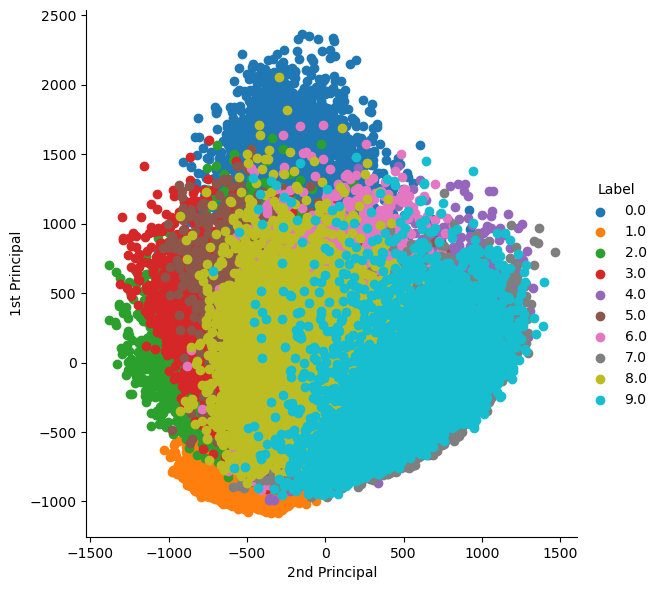

In [448]:
sbn.FacetGrid(pca_dataframe, hue = "Label", height = 6).map(plt.scatter, "2nd Principal","1st Principal").add_legend()